In [228]:
'''
Data analysis for the beer dataset
'''

'\nData analysis for the beer dataset\n'

In our analysis, we analysed a beer dataset consisting of up to 50 top-rated beers with a total of 5558. The project aims to provide insights to a potential beer market entrant to offer customers beers of the highest ratings. The dataset contains information on the beer supplied by BeerAdvocate.com and the tasting features offered by up to 25 customer reviews, assuming that customers provide reviews describing the beer based on their experience rather than not. 

In [229]:
# import libraries

# numerical analytics
import pandas as pd
import numpy as np

#visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# text preprocessing
import datetime
import re, string
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer

# machine learning 
from sklearn.model_selection import train_test_split

## Build the model

In [230]:
# read file
df_clean = pd.read_csv("df_clean.csv",index_col=0)
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3360 entries, 0 to 3359
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   key                      3360 non-null   int64  
 1   Brewery Key              3360 non-null   int64  
 2   Style Key                3360 non-null   int64  
 3   Description              3360 non-null   object 
 4   ABV                      3360 non-null   float64
 5   Ave Rating               3360 non-null   float64
 6   Min IBU                  3360 non-null   int64  
 7   Max IBU                  3360 non-null   int64  
 8   Astringency_customer     3360 non-null   int64  
 9   Body_customer            3360 non-null   int64  
 10  Alcohol_customer         3360 non-null   int64  
 11  Bitter_customer          3360 non-null   int64  
 12  Sweet_customer           3360 non-null   int64  
 13  Sour_customer            3360 non-null   int64  
 14  Salty_customer          

In [231]:
# make a copy
df_new = df_clean.copy()

In [232]:
# feature engineering 
df_new["Ave IBU"] = (df_new["Min IBU"] + df_new["Max IBU"])/2

#drop unused columns
df_new = df_new.drop(['Min IBU', 'Max IBU', 'key', 'Description','Style Key', 'Brewery Key'], axis = 1)
df_new.shape

(3360, 25)

In [233]:
# split the data with split
from sklearn.model_selection import StratifiedShuffleSplit
train_set, test_set = train_test_split(df_new, test_size=0.3, random_state=42)
print(train_set.shape)
print(test_set.shape)

(2352, 25)
(1008, 25)


In [234]:
# separate the dependent and independent variable
x_train = train_set.drop(["Ave Rating"], axis = 1)
y_train = train_set[["Ave Rating"]]

x_test = test_set.drop(["Ave Rating"], axis = 1)
y_test = test_set[["Ave Rating"]]

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(2352, 24)
(1008, 24)
(2352, 1)
(1008, 1)


In [235]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2352 entries, 2892 to 3174
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ABV                      2352 non-null   float64
 1   Astringency_customer     2352 non-null   int64  
 2   Body_customer            2352 non-null   int64  
 3   Alcohol_customer         2352 non-null   int64  
 4   Bitter_customer          2352 non-null   int64  
 5   Sweet_customer           2352 non-null   int64  
 6   Sour_customer            2352 non-null   int64  
 7   Salty_customer           2352 non-null   int64  
 8   Fruits_customer          2352 non-null   int64  
 9   Hoppy_customer           2352 non-null   int64  
 10  Spices_customer          2352 non-null   int64  
 11  Malty_customer           2352 non-null   int64  
 12  Astringency_description  2352 non-null   int64  
 13  Body_description         2352 non-null   int64  
 14  Alcohol_description  

In [236]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

## scale the customer reviews
# step 1: we scale the reviews by row and create a new dataframe
scaled_customer = pd.DataFrame(scaler.fit_transform(x_train.iloc[:,1:11].T).T,columns=x_train.iloc[:,1:11].columns) 

# step 2: drop unscaled reviews 
x_drop = x_train.drop(x_train.iloc[:,1:11],axis=1).reset_index(drop=True)

# step 3: concat the scaled customer reviews 
x_train_scaled = pd.concat([x_drop,scaled_customer],axis=1)

# scale the numerical values of the whole dataframe (excluding categorical variable)
x_train_scaled.iloc[:,[0,13,14,15,16,17,18,19,20,21,22,23]] = scaler.fit_transform(x_train_scaled.iloc[:,[0,13,14,15,16,17,18,19,20,21,22,23]]) 
x_train_scaled.head()

,ABV,Malty_customer,Astringency_description,Body_description,Alcohol_description,Bitter_description,Sweet_description,Sour_description,Salty_description,Fruits_description,...,Astringency_customer,Body_customer,Alcohol_customer,Bitter_customer,Sweet_customer,Sour_customer,Salty_customer,Fruits_customer,Hoppy_customer,Spices_customer
0,-0.342162,95,0,1,0,1,1,0,0,0,...,-0.282702,2.321630,-0.101510,0.431386,-0.029775,-0.550562,1.052160,-1.129862,-0.476002,-0.311019
1,-0.668782,86,0,0,0,0,0,0,0,0,...,2.156333,1.029275,-1.518695,0.116002,-0.672776,-0.128704,-0.968746,-0.027391,0.758985,-0.899280
2,-0.954574,23,1,0,1,0,0,1,0,1,...,0.485839,-1.033930,-0.180305,-1.303189,-1.075197,1.979832,1.213085,1.603305,-0.703440,-0.395210
3,1.086798,83,0,0,0,0,0,0,0,0,...,-0.455561,2.008225,0.687175,0.555612,0.451095,-0.848933,0.460960,-1.008214,-1.017315,-0.011869
4,-0.138025,51,0,1,0,0,0,0,0,0,...,-0.237250,0.018983,-0.067132,-0.978415,-0.355840,-0.687263,0.958988,-0.543130,-0.956221,3.498924


In [237]:
from sklearn.linear_model import LinearRegression

In [238]:
# scale x_test
## scale the customer reviews
# step 1: we scale the reviews by row and create a new dataframe
scaled_customer_test = pd.DataFrame(scaler.fit_transform(x_test.iloc[:,1:11].T).T,columns=x_test.iloc[:,1:11].columns) 

# step 2: drop unscaled reviews 
x_drop_test = x_test.drop(x_test.iloc[:,1:11],axis=1).reset_index(drop=True)

# step 3: concat the scaled customer reviews 
x_test_scaled = pd.concat([x_drop_test,scaled_customer_test],axis=1)

# scale the numerical values of the whole dataframe (excluding categorical variable)
x_test_scaled.iloc[:,[0,13,14,15,16,17,18,19,20,21,22,23]] = scaler.fit_transform(x_test_scaled.iloc[:,[0,13,14,15,16,17,18,19,20,21,22,23]]) 

x_test_scaled.head().T

,0,1,2,3,4
ABV,-0.686938,-0.403037,-0.281366,-0.200251,-1.214181
Malty_customer,68.000000,23.000000,45.000000,20.000000,65.000000
Astringency_description,1.000000,0.000000,1.000000,0.000000,1.000000
Body_description,1.000000,0.000000,1.000000,1.000000,0.000000
Alcohol_description,0.000000,1.000000,0.000000,0.000000,0.000000
Bitter_description,1.000000,0.000000,1.000000,1.000000,1.000000
Sweet_description,0.000000,1.000000,0.000000,0.000000,0.000000
Sour_description,0.000000,1.000000,0.000000,0.000000,0.000000
Salty_description,0.000000,0.000000,0.000000,0.000000,0.000000
Fruits_description,0.000000,1.000000,0.000000,0.000000,0.000000


In [239]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

# fit the model
lr = LinearRegression()
lr.fit(x_train_scaled, y_train)

# check the accuracy of our model 
lin_scores = cross_val_score(lr, x_test_scaled, y_test,
                            scoring="neg_mean_squared_error", cv=10)

lin_rmse_scores = np.sqrt(-lin_scores)

def display_scores(scores):
    print("Scores: ", scores)
    print("Mean: ", scores.mean())
    print("Standard deviation: ", scores.std())

display_scores(lin_rmse_scores)

Scores:  [0.31700109 0.33765568 0.31738127 0.30730736 0.33937159 0.36242087
 0.36583082 0.29913854 0.31829821 0.28117462]
Mean:  0.32455800462367507
Standard deviation:  0.02549839603254161


In [240]:
# Decision Trees as a form of nested regression models
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# set up the model
dt = DecisionTreeRegressor()
dt.fit(x_train_scaled, y_train)

# test accuracy using cross-validation scores
dt_scores = cross_val_score(dt, x_test_scaled, y_test,
                           scoring="neg_mean_squared_error", cv=10)
dt_scores_rmse = np.sqrt(-dt_scores)
display_scores(dt_scores_rmse)

Scores:  [0.38766373 0.44515766 0.36014574 0.40962915 0.46422831 0.39065951
 0.44767496 0.32005878 0.42430767 0.39928436]
Mean:  0.40488098694556907
Standard deviation:  0.041354124796744135


In [241]:
# Random Forest regression as a collection of decision trees

forest = RandomForestRegressor()
forest.fit(x_train_scaled, y_train)

rf_pred = forest.predict(x_test_scaled)
rf_mse = mean_squared_error(y_test, rf_pred)
rf_rmse = np.sqrt(rf_mse)
print("Training dataset RMSE: ", rf_rmse)

forest_scores_cv = cross_val_score(forest, x_test_scaled, y_test,
                               scoring="neg_mean_squared_error", cv=10)
forest_rmse_cv = np.sqrt(-forest_scores_cv)
display_scores(forest_rmse_cv)

# Note reduction in error by 0.1 rating from the dt model

/opt/anaconda3/envs/smm284/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Training dataset RMSE:  0.2638617263735711


/opt/anaconda3/envs/smm284/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/envs/smm284/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/envs/smm284/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/envs/smm284/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:

Scores:  [0.28141255 0.32606701 0.28807344 0.25634818 0.28112604 0.2924813
 0.33017318 0.2861235  0.24063816 0.23866879]
Mean:  0.2821112159724396
Standard deviation:  0.029451146449756275


In [243]:
from sklearn.model_selection import GridSearchCV

# let's fine-tune our model using GridSearch

param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}
]

grid_forest = GridSearchCV(forest, param_grid, cv=5,
                          scoring='neg_mean_squared_error',
                          return_train_score=True)

grid_forest.fit(x_train_scaled, y_train)

grid_forest.best_params_

/opt/anaconda3/envs/smm284/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/envs/smm284/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/envs/smm284/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/envs/smm284/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:

{'max_features': 6, 'n_estimators': 30}

In [244]:
# check all the GridSearch results
cvres = grid_forest.cv_results_

for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
    print(np.sqrt(-mean_score), params)

0.33656421622589916 {'max_features': 2, 'n_estimators': 3}
0.29715317672798924 {'max_features': 2, 'n_estimators': 10}
0.2811902796937814 {'max_features': 2, 'n_estimators': 30}
0.3137000939227395 {'max_features': 4, 'n_estimators': 3}
0.28474457586759905 {'max_features': 4, 'n_estimators': 10}
0.272431400056363 {'max_features': 4, 'n_estimators': 30}
0.3114238443174418 {'max_features': 6, 'n_estimators': 3}
0.2812004386732584 {'max_features': 6, 'n_estimators': 10}
0.268808808844235 {'max_features': 6, 'n_estimators': 30}
0.31332796633809673 {'max_features': 8, 'n_estimators': 3}
0.2820917292951538 {'max_features': 8, 'n_estimators': 10}
0.26980748448486996 {'max_features': 8, 'n_estimators': 30}
0.3251593437941083 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
0.291243394919521 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
0.31779834233489757 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
0.27913759708652874 {'bootstrap': False, 'max_features': 3

In [245]:
# check what particularly works in the 'best model'

feature_importances = grid_forest.best_estimator_.feature_importances_
attributes = list(x_train_scaled)
sorted(zip(feature_importances, attributes),reverse=True)

# order by most important (ABV is the most important feature)

[(0.17229641984094093, 'ABV'),
 (0.10558328441908824, 'Fruits_customer'),
 (0.10091244767799036, 'Ave IBU'),
 (0.08395438422424915, 'Hoppy_customer'),
 (0.07528238569174768, 'Spices_customer'),
 (0.06845245555689868, 'Alcohol_customer'),
 (0.0641019906362846, 'Sour_customer'),
 (0.05747177271464722, 'Malty_customer'),
 (0.04964920787895038, 'Astringency_customer'),
 (0.04953596779912098, 'Body_customer'),
 (0.04932311654944046, 'Sweet_customer'),
 (0.048355305349197984, 'Bitter_customer'),
 (0.029846112293883877, 'Salty_customer'),
 (0.006121797345819468, 'Bitter_description'),
 (0.005392002902303422, 'Alcohol_description'),
 (0.005052168272976729, 'Body_description'),
 (0.004888938646300521, 'Malty_description'),
 (0.00477617896284228, 'Astringency_description'),
 (0.004325914815363443, 'Sour_description'),
 (0.003749618755688749, 'Fruits_description'),
 (0.0034834567703858504, 'Sweet_description'),
 (0.0034414265802119497, 'Spices_description'),
 (0.0033546059380086747, 'Hoppy_descri

Text(0, 0.5, 'Feature Names')

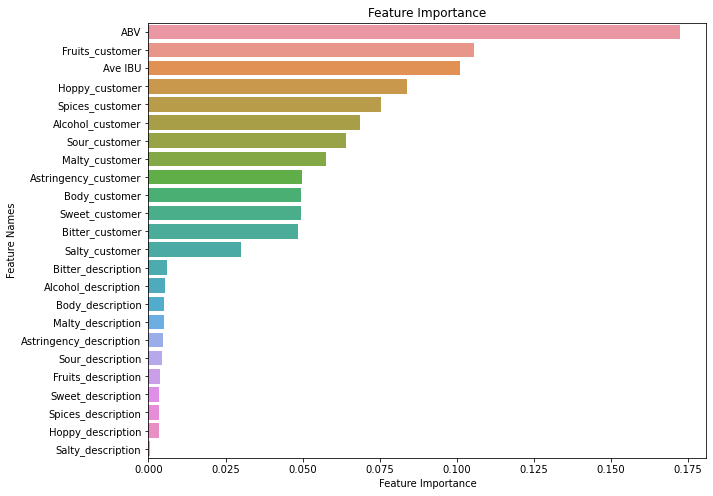

In [246]:
# visualise feature importance
# create dataframe
fi_df = pd.DataFrame(sorted(zip(feature_importances, attributes),reverse=True),columns=['feature_importance','attributes'])
# define size of bar plot
plt.figure(figsize=(10,8))
# plot Searborn bar chart
sns.barplot(x=fi_df['feature_importance'], y=fi_df['attributes'])
# add chart labels
plt.title('Feature Importance')
plt.xlabel('Feature Importance')
plt.ylabel('Feature Names')

The most important feature identified is the ABV, followed by the average IBU and style. We can see that the customer review of the beer tasting profile is more important than the beer description in predicting the beer rating. By using this information, brewers can consider the most important features when selecting the type of beers to sell in a new market. However, brewers are recommended to understand customers tasting profiles in the new market first.

**Business Insights for regression analysis**: </br> </br>
The random forest regression model indicates that the ABV and average IBU of the beer are the top 2 most important factors for a high rating score. Customers generally prefer lower ABV and higher average IBU. However, customers displayed varying preferences for the taste of the beers and did not show a strong correlation in the rating. By using this information, brewers can consider the ABV and average IBU of the beer when selecting the type of beers to sell in a market. However, brewers are recommended to understand customers tasting profiles when predicting the beer ratings if they wish to enter a new market. 

Text(0, 0.5, 'rating')

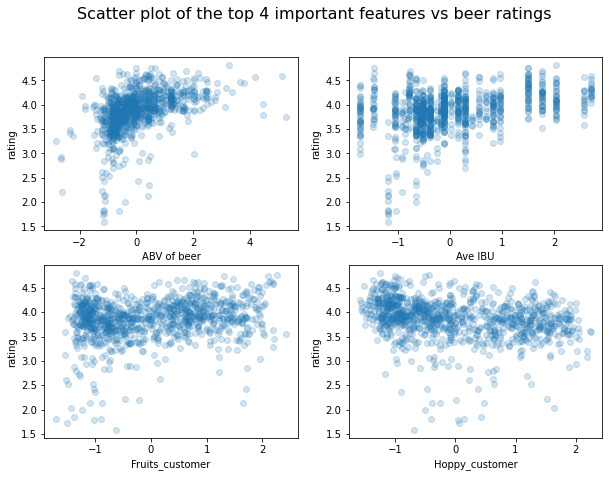

In [291]:
# scatter plot of the top 4 most important features vs the beer ratings
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,figsize=(10,7))
fig.suptitle("Scatter plot of the top 4 important features vs beer ratings", fontsize=16)
ax1.scatter(x_test_scaled['ABV'], y_test, alpha=0.2)
ax1.set_xlabel('ABV of beer')
ax1.set_ylabel('rating')
ax2.scatter(x_test_scaled['Ave IBU'], y_test, alpha=0.2)
ax2.set_xlabel('Ave IBU')
ax2.set_ylabel('rating')
ax3.scatter(x_test_scaled['Fruits_customer'], y_test,alpha=0.2)
ax3.set_xlabel('Fruits_customer')
ax3.set_ylabel('rating')
ax4.scatter(x_test_scaled['Hoppy_customer'], y_test,alpha=0.2)
ax4.set_xlabel('Hoppy_customer')
ax4.set_ylabel('rating')

In [ ]:
# Scatter plot for ABV and the rating
fig1 = plt.figure(figsize=(3,3))
plt.scatter(x_test_scaled['ABV'], y_test, color = 'blue',alpha=0.2)
plt.xlabel("ABV of beer")
plt.ylabel("rating")
plt.show()

# Scatter plot for Ave IBU and the rating
fig2 = plt.figure(figsize=(3,3))
plt.scatter(x_test_scaled['Ave IBU'], y_test, color = 'blue',alpha=0.2)
plt.xlabel("Average IBU of beer")
plt.ylabel("rating")
plt.show()

# Scatter plot for fruits_customer and the score
fig3 = plt.figure(figsize=(3,3))
plt.scatter(x_test_scaled['Fruits_customer'], y_test, color = 'blue',alpha=0.2)
plt.xlabel("fruits_customer")
plt.ylabel("rating")
plt.show()

# Scatter plot for hoppy_customer and the score
fig4 = plt.figure(figsize=(3,3))
plt.scatter(x_test_scaled['Hoppy_customer'], y_test, color = 'blue',alpha=0.2)
plt.xlabel("hoppy_customer")
plt.ylabel("rating")
plt.show()

In [247]:
# up until now we haven't used the test dataset that we locked away at the beginning of the analysis
#  we'll now test our model on this airlocked data to check we haven't overfit

final_model = grid_forest.best_estimator_

final_predictions = final_model.predict(x_test_scaled)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

0.2719478950605538

In [248]:
from scipy import stats

In [249]:
#  we might also want a confidence interval on this error estimate

confidence = 0.95
squared_errors = (final_predictions - y_test["Ave Rating"]) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                        loc=squared_errors.mean(),
                        scale=stats.sem(squared_errors)))

array([0.2490254 , 0.29308304])

In [47]:
# table showing our application of in-class materials to our beer dataset
table_of_content = pd.DataFrame([
                                ["Data cleansing & Exploratory Data Analysis (EDA)", "Conducted data cleaning and EDA for our beer dataset"], 
                                ["Machine learning concepts", "Feature scaling; created train, validation and test samples to conduct regression, decision trees, random forest, cross validation; used RMSE for model comparison. Conducted PCA and k-means clustering analysis to identify customers' preferences for beer flavours"],
                                ["NLP pipeline, Topic Modelling, Sentiment Analysis", "Using spacy NLP model to preprocess the data; using spacy matcher to extract key information from the dataset; conducted sentiment analysis on customers' reviews"],
                                ["Neural networks and deep learning","Calculated loss functions, and carry out hyper-parameter tuning for deep learning"]
                                ],
                                columns=["Key concepts","Use of concepts in our analysis"])
pd.set_option('display.max_colwidth', None)
table_of_content

,Key concepts,Use of concepts in our analysis
0,Data cleansing & Exploratory Data Analysis (EDA),Conducted data cleaning and EDA for our beer dataset
1,Machine learning concepts,"Feature scaling; created train, validation and test samples to conduct regression, decision trees, random forest, cross validation; used RMSE for model comparison. Conducted PCA and k-means clustering analysis to identify customers' preferences for beer flavours"
2,"NLP pipeline, Topic Modelling, Sentiment Analysis",Using spacy NLP model to preprocess the data; using spacy matcher to extract key information from the dataset; conducted sentiment analysis on customers' reviews
3,Neural networks and deep learning,"Calculated loss functions, and carry out hyper-parameter tuning for deep learning"
